In [16]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%autoreload 2

import _utils as utils

plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'figure.titlesize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

plt.style.use('ggplot')

In [2]:
df = utils.read_data('results')

In [3]:
df.scenario.unique()

array(['CEDS', 'SSP2-45-SPA2-V25', 'SSP2-45-SPA2-V25-no',
       'SSP2-Ref-SPA0-V25', 'SSP2-Ref-SPA0-V25-no'], dtype=object)

In [4]:
ceds = df.scenario == 'CEDS'
noover = df.scenario.str.contains('no')
x = df[ceds | noover]
y = df[ceds | ~noover]

In [5]:
def results_plot(x, y, gas, sector, regions=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    regions = regions or '5_regions'
    
    # panel a
    ax = axs[0]
    utils.plot_lines(x, ax=ax, gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=False, hline=False, colorby='region',
                    fillstyle='full', label_markers=False)
    ax.set_title('Regional Emissions w/o Overrides')
    ax.get_xaxis().get_label().set_visible(False)
    ax.set_ylabel('Mt {}/yr'.format(gas))

    # panel b
    ax = axs[1]
    utils.plot_lines(y, ax=ax, gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=False)
    ax.set_ylim(axs[0].get_ylim())
    ax.set_title('Regional Emissions w/ Overrides')
    ax.get_xaxis().get_label().set_visible(False)

    # panel c
    ax = axs[2]
    utils.plot_lines(x, ax=ax, gas=gas, sector=sector, regions=['World'], 
                     unharmonized=True, legend=False, hline=False,
                    fillstyle='full', label_markers=False)
    ax.set_title('Global Emissions w/o Overrides')
    ax.set_xlabel('Year'.format(gas))
    ax.set_ylabel('Mt {}/yr'.format(gas))
    
    # panel d
    ax = axs[3]
    utils.plot_lines(y, ax=ax, gas=gas, sector=sector, regions=['World'], 
                     unharmonized=True, legend=True, hline=False,
                    fillstyle='full', label_markers=False)
    ax.set_ylim(axs[2].get_ylim())
    ax.set_title('Global Emissions w/ Overrides')
    ax.set_xlabel('Year'.format(gas))
     
    for ax, letter in zip(axs, ['a', 'b', 'c', 'd']):
        ax.text(-0.15, 1.01, letter, transform=ax.transAxes, fontsize=16, fontweight='bold')
        ax.set_ylim([0, None])
    #fig.suptitle('{} emissions in the {}'.format(gas, sector))
    
    plt.tight_layout()
    plt.savefig('../figs/results_{}_{}.pdf'.format(gas, sector).replace(' ', '_'))

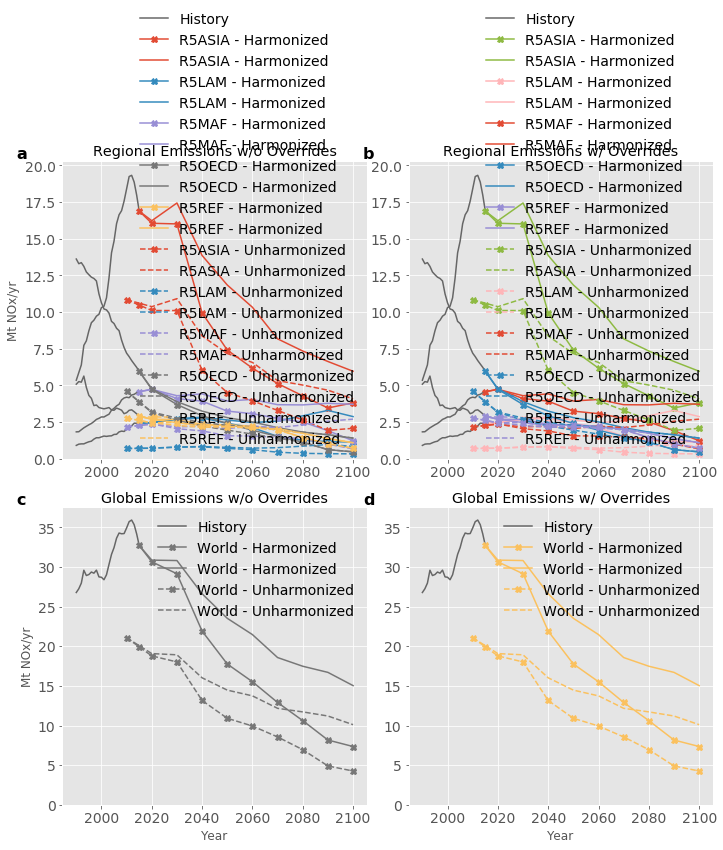

In [6]:
gas = 'NOx'
sector = 'Energy Sector'
results_plot(x, y, gas, sector)

In [7]:
y.head()

,region,model,scenario,ind,year,value,ssp,kind
0,AFR,History,CEDS,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,1990,0.060111,CEDS,History
2,AFR,History,CEDS,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,1991,0.066720,CEDS,History
4,AFR,History,CEDS,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,1992,0.063193,CEDS,History
6,AFR,History,CEDS,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,1993,0.064592,CEDS,History
8,AFR,History,CEDS,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,1994,0.063353,CEDS,History


In [13]:
def results_plot_separate_regions(x, y, gas, sector, regions):
    fig, axs = plt.subplots(len(regions), 2, figsize=(10, 5 * len(regions)))
    
    for (ax1, ax2), region in zip(axs, regions):
            utils.reset_default_colors()
            legend_include=False
            utils.plot_lines(x, ax=ax1, gas=gas, sector=sector, regions=[region], world=False, 
                     unharmonized=True, hline=False, colorby='kind',
                    fillstyle='full', label_markers=False, legend_include=legend_include)
            ax1.set_title('{} w/o Overrides'.format(region))
            ax1.get_xaxis().get_label().set_visible(False)
            ax1.set_ylabel('Mt {}/yr'.format(gas))

            utils.reset_default_colors()
            legend_include = None if region == regions[0] else False
            utils.plot_lines(y, ax=ax2, gas=gas, sector=sector, regions=[region], world=False, 
                     unharmonized=True, legend_include=legend_include, hline=False, colorby='kind',
                    fillstyle='full', label_markers=False)
            ax2.set_title('{} w/ Overrides'.format(region))
            ax2.get_xaxis().get_label().set_visible(False)
            lim1 = ax1.get_ylim()
            lim2 = ax2.get_ylim()
            if lim1[1] > lim2[1]:
                ax2.set_ylim(ax1.get_ylim())
            else:
                ax1.set_ylim(ax2.get_ylim())
                


    for ax, letter in zip(axs.ravel(), ['a', '', 'b', '', 'c', '']):
        ax.text(-0.15, 1.01, letter, transform=ax.transAxes, fontsize=16, fontweight='bold')
        ax.set_ylim([0, None])
    #plt.tight_layout()

    fig.suptitle('{} {} Emissions'.format(sector, gas))
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.savefig('../figs/sep_regions_results_{}_{}.pdf'.format(gas, sector).replace(' ', '_'))

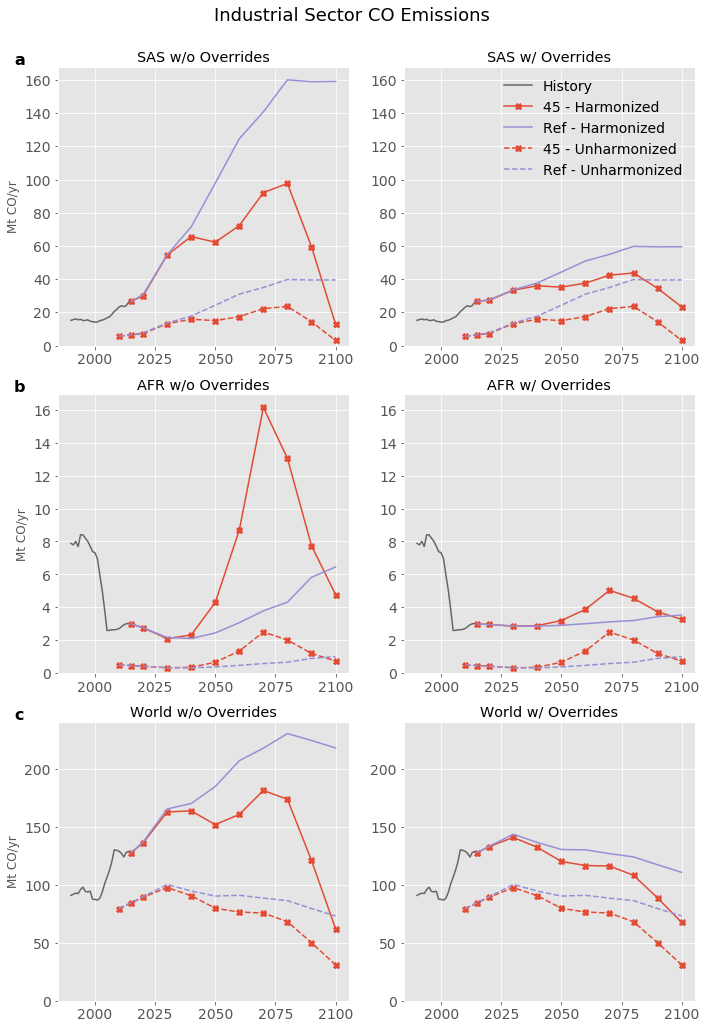

In [20]:
gas='CO'
sector='Industrial Sector'

## search for regions with overrides
#regions = ['SAS', 'CPA', 'PAS', 'World']
#regions = ['WEU', 'EEU', 'NAM', 'AFR', 'LAM', 'FSU', 'MEA', 'PAO'] + regions

regions = ['SAS', 'AFR', 'World']
results_plot_separate_regions(x, y, gas, sector, regions=regions)

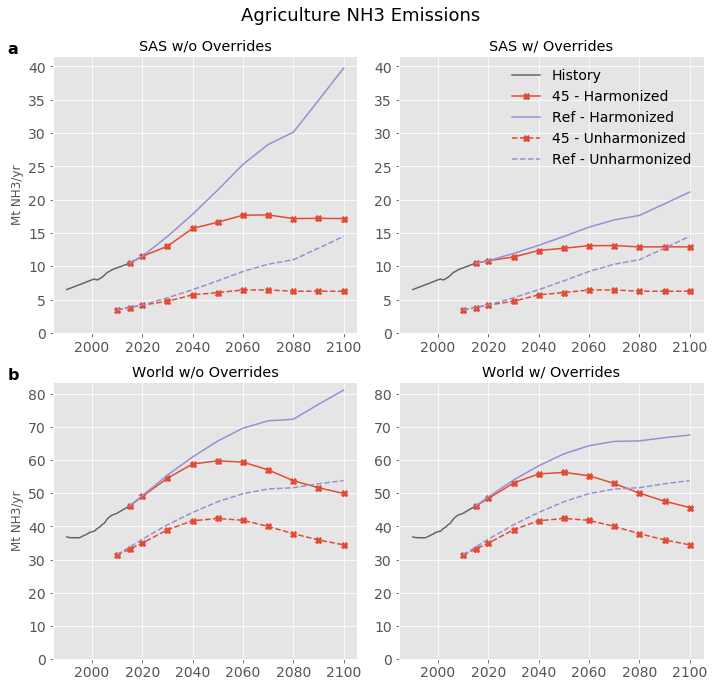

In [22]:
gas='NH3'
sector='Agriculture'

## search for regions with overrides
#regions = ['SAS', 'CPA', 'PAS', 'World']
#regions = ['WEU', 'EEU', 'NAM', 'AFR', 'LAM', 'FSU', 'MEA', 'PAO'] + regions

regions = ['SAS', 'World']
results_plot_separate_regions(x, y, gas, sector, regions=regions)